In [15]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

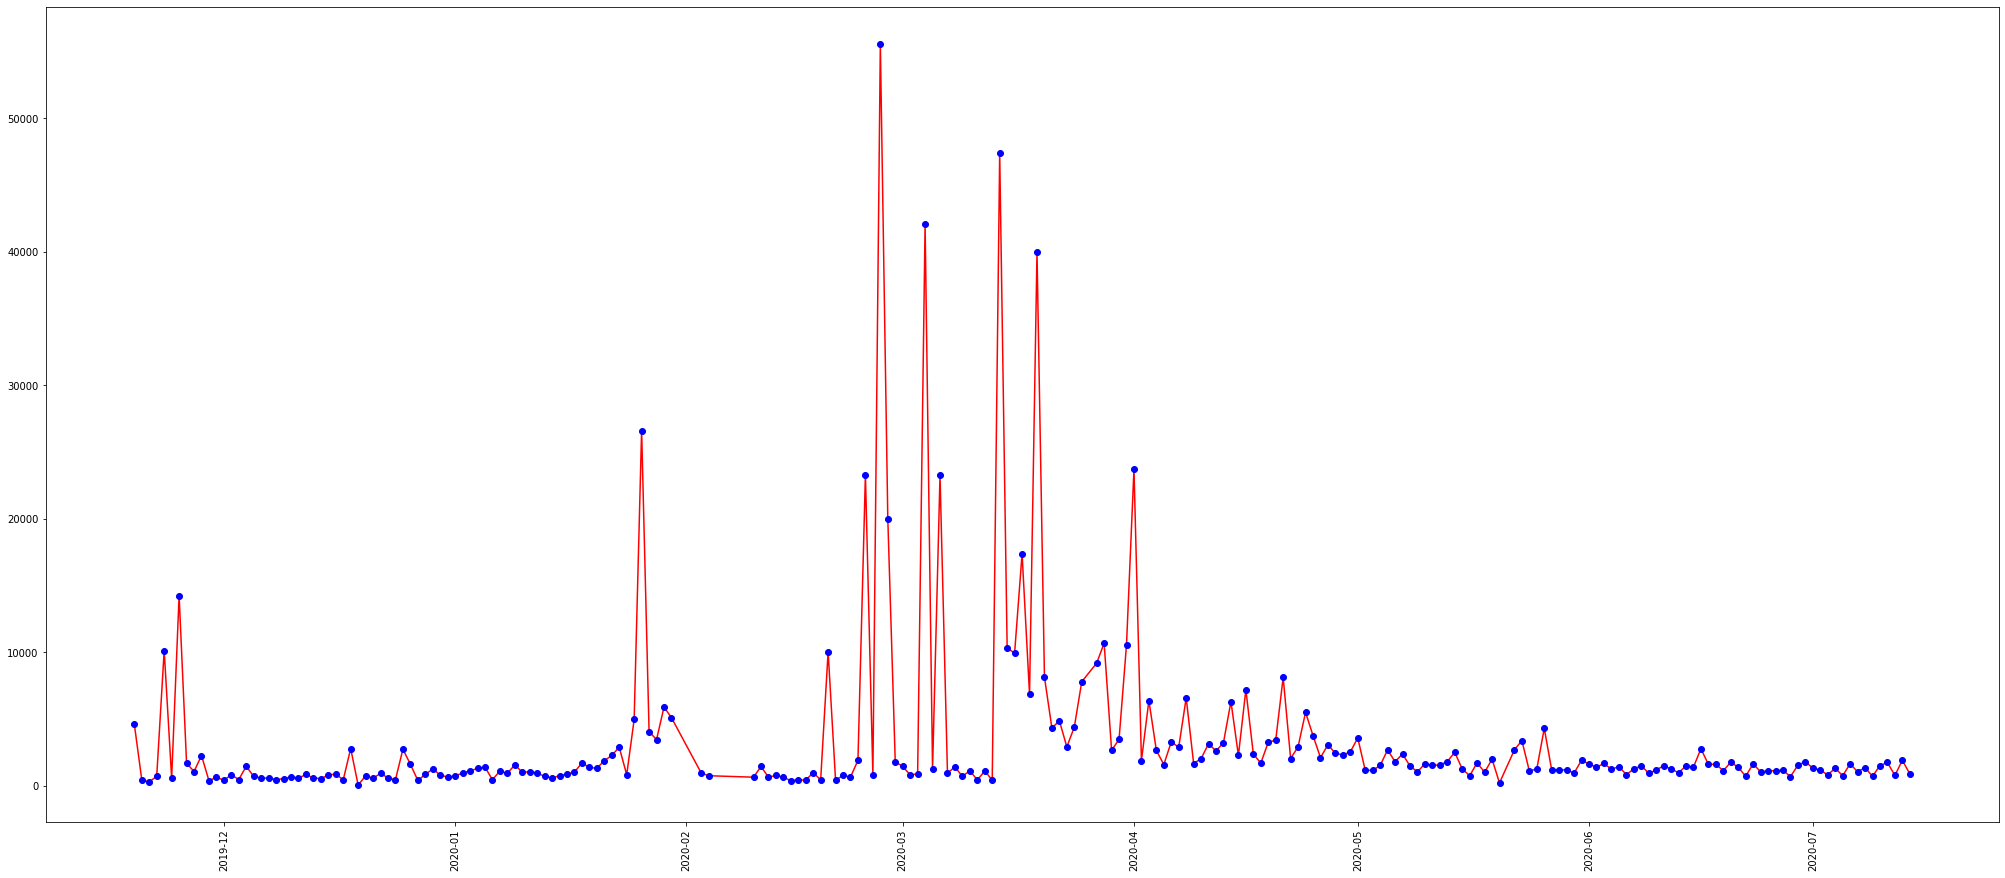

In [16]:
trainday = pd.read_excel(r"G:\traindata\yddata\daysale_all.xlsx")#读取展示数据
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(35, 15))
ax = fig.add_subplot(111)
ax.plot(trainday['saledate'],trainday['money'],'r-')
ax.plot(trainday['saledate'],trainday['money'],'bo')
plt.xticks(rotation=90)
plt.show

In [17]:
trainday  = pd.DataFrame(trainday)
X = trainday.iloc[:,trainday.columns != 'money']
X.iloc[:,0] = X.iloc[:,0].apply(pd.to_datetime).map(dt.datetime.toordinal)

D:\anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [18]:
y = trainday.iloc[:,trainday.columns == 'money']
y = y.values.reshape(-1, 1)

In [149]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=106)#数据拆分
reg = LinearRegression().fit(Xtrain,Ytrain)#线性模型
reg.score(Xtrain,Ytrain)

0.09349025064844729

<function matplotlib.pyplot.show(*args, **kw)>

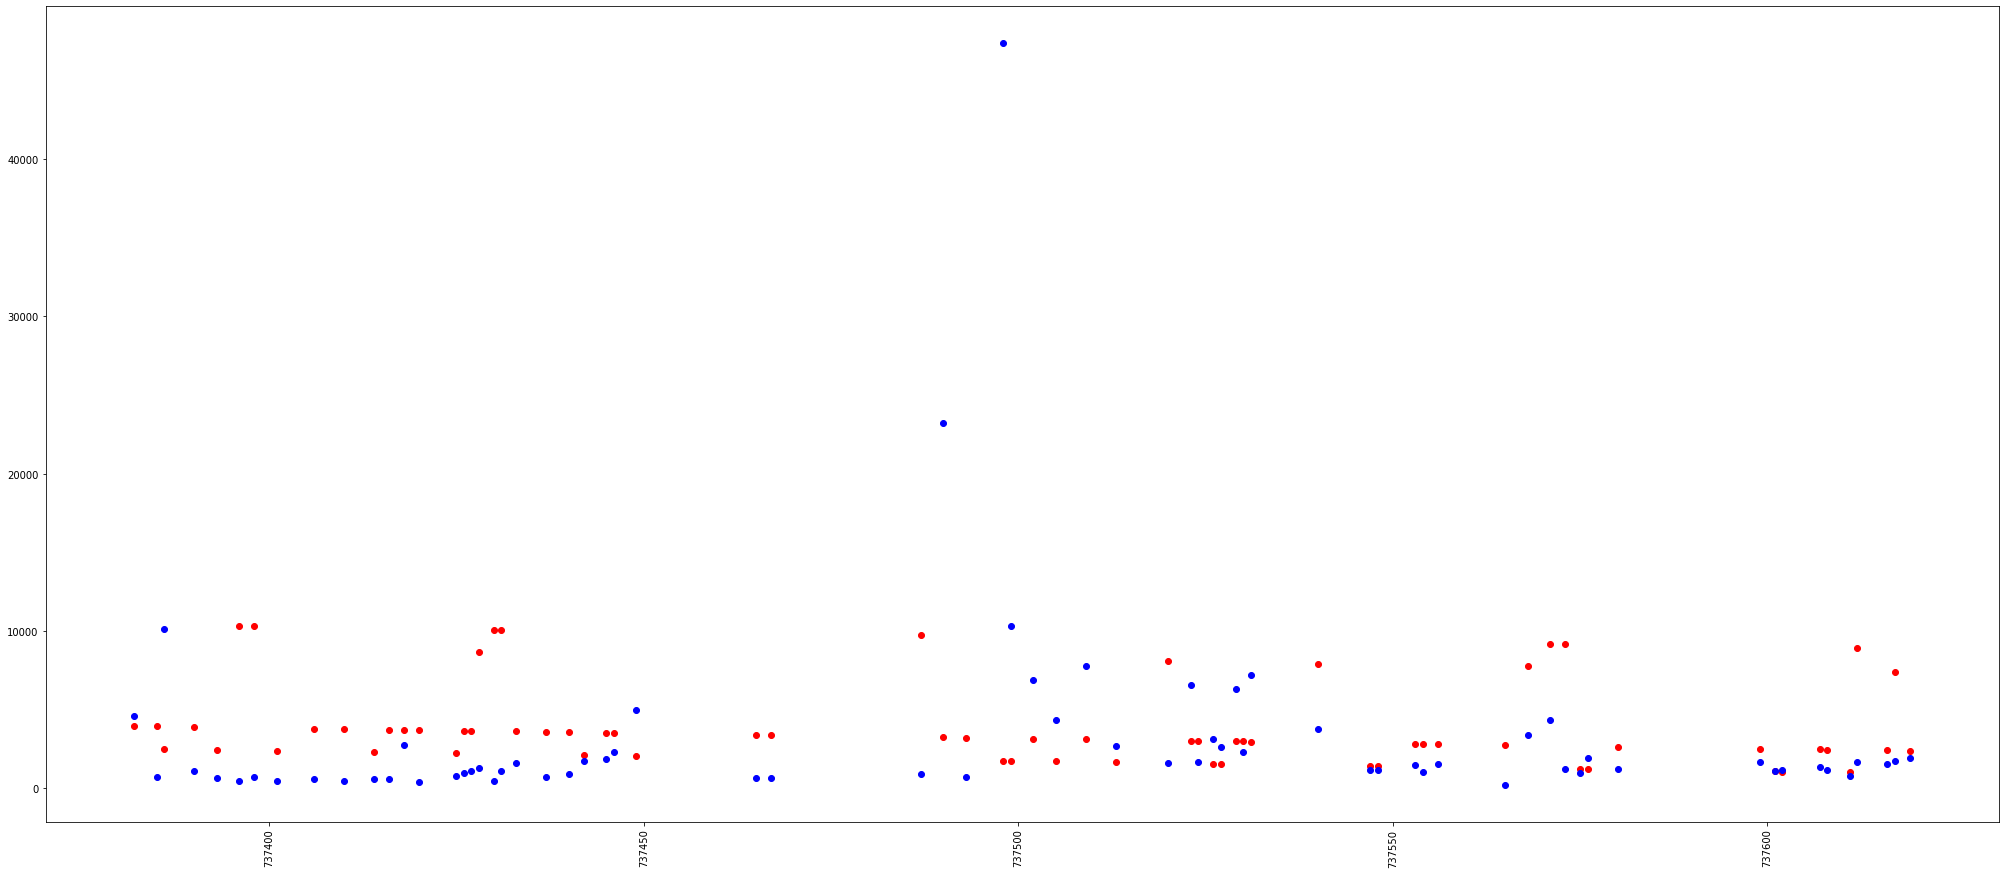

In [150]:
Y_pre = reg.predict(Xtest)#求测试值
fig = plt.figure(figsize=(35, 15))#展示
ax = fig.add_subplot(111)
ax.plot(Xtest.iloc[:,0],Y_pre,'ro')
ax.plot(Xtest.iloc[:,0],Ytest,'bo')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

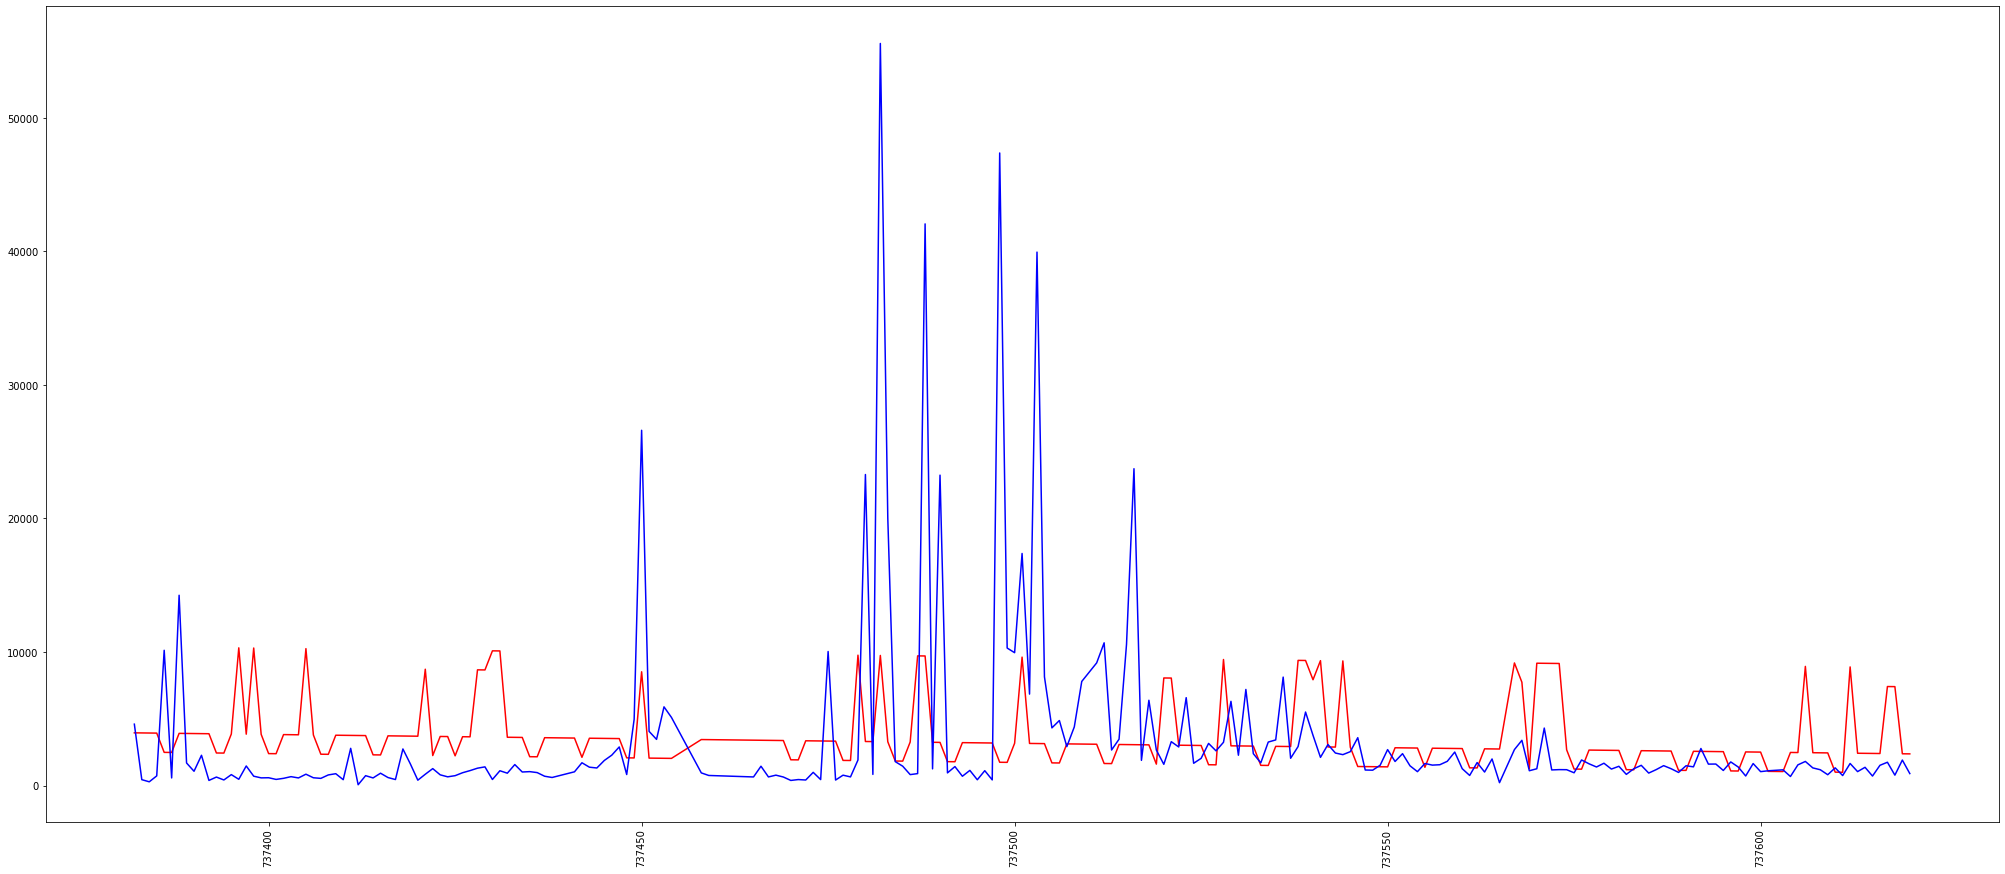

In [152]:
Y_hat = reg.predict(X)#求测试值
fig = plt.figure(figsize=(35, 15))#展示
ax = fig.add_subplot(111)
ax.plot(X.iloc[:,0],Y_hat,'r-')
ax.plot(X.iloc[:,0],y,'b-')
plt.xticks(rotation=90)
plt.show

In [153]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=196)#数据拆分from sklearn.preprocessing import PolynomialFeatures #多项式回归  
poly = PolynomialFeatures(degree=4,include_bias=False)#添加多项式回归，增加拟合程度           有周末标签
Xtrain_poly = poly.fit_transform(Xtrain)#分别对训练集和测试集进行处理
Xtest_poly = poly.fit_transform(Xtest)#
X_poly = poly.fit_transform(X)
model = LinearRegression(normalize=True).fit(Xtrain_poly,Ytrain)#建模
model.score(Xtest_poly,Ytest)

0.3386983798358838

<function matplotlib.pyplot.show(*args, **kw)>

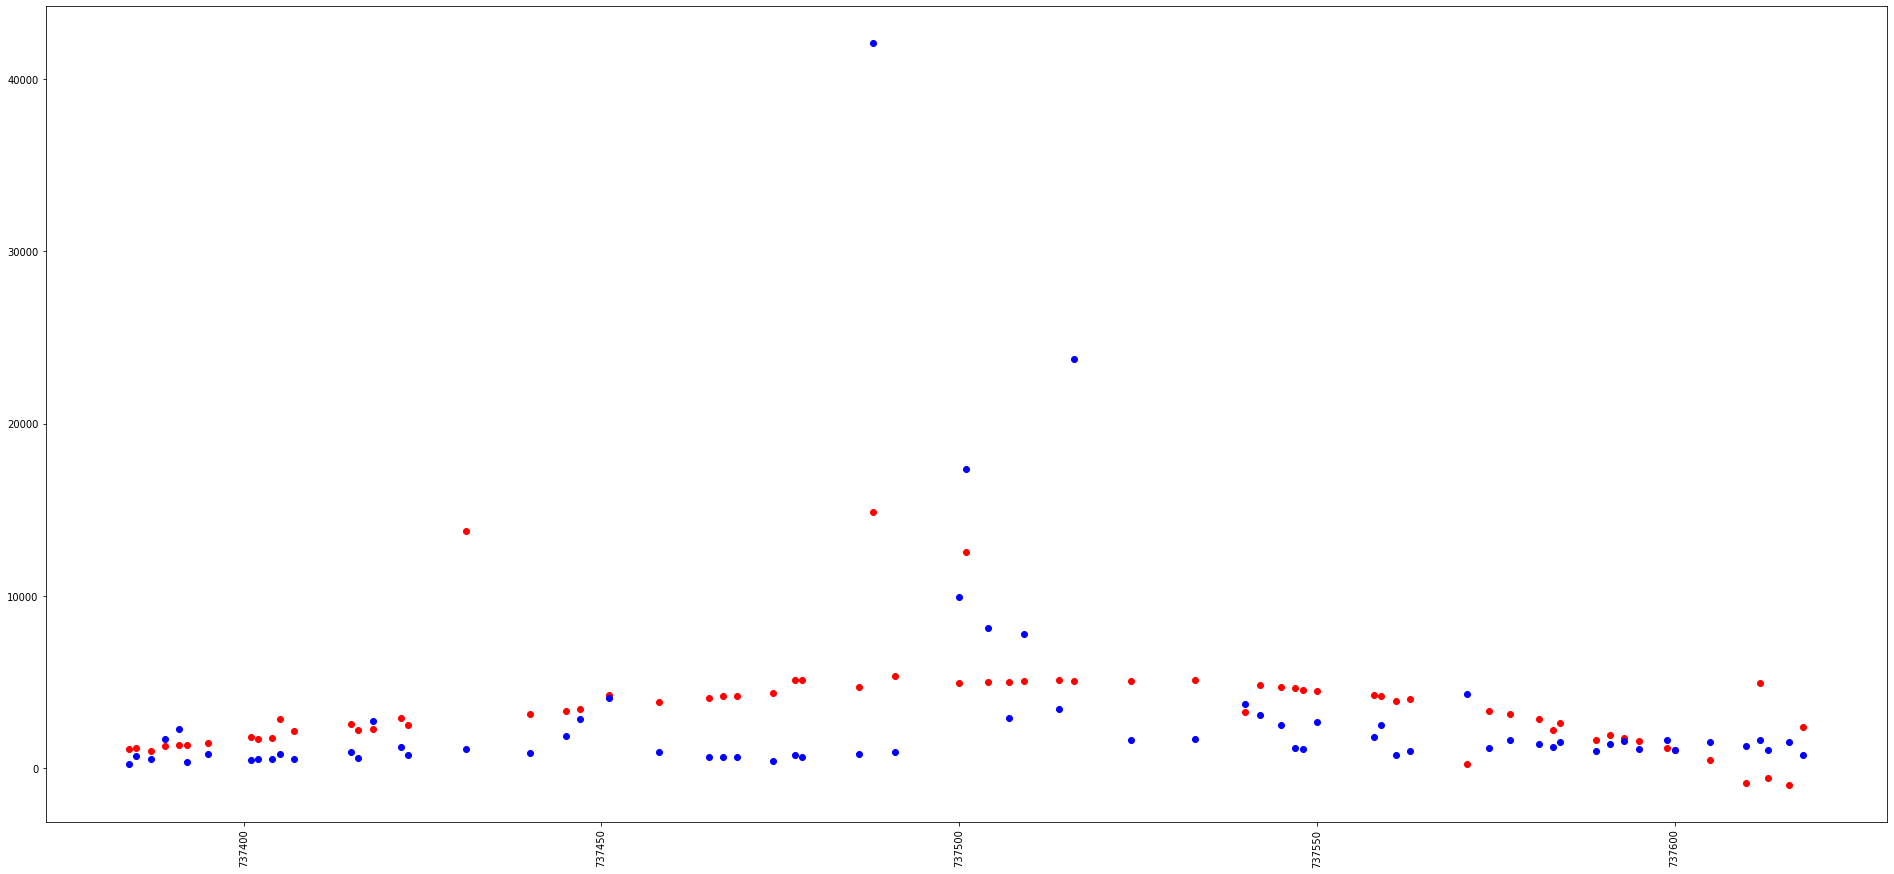

In [157]:
y_pre = model.predict(Xtest_poly)#预测
fig = plt.figure(figsize=(33, 15))#展示
ax = fig.add_subplot(111)
ax.plot(Xtest.iloc[:,0],y_pre,'ro')
ax.plot(Xtest.iloc[:,0],Ytest,'bo')
plt.xticks(rotation=90)
plt.show

In [155]:
y_hat = model.predict(X_poly)#预测

<function matplotlib.pyplot.show(*args, **kw)>

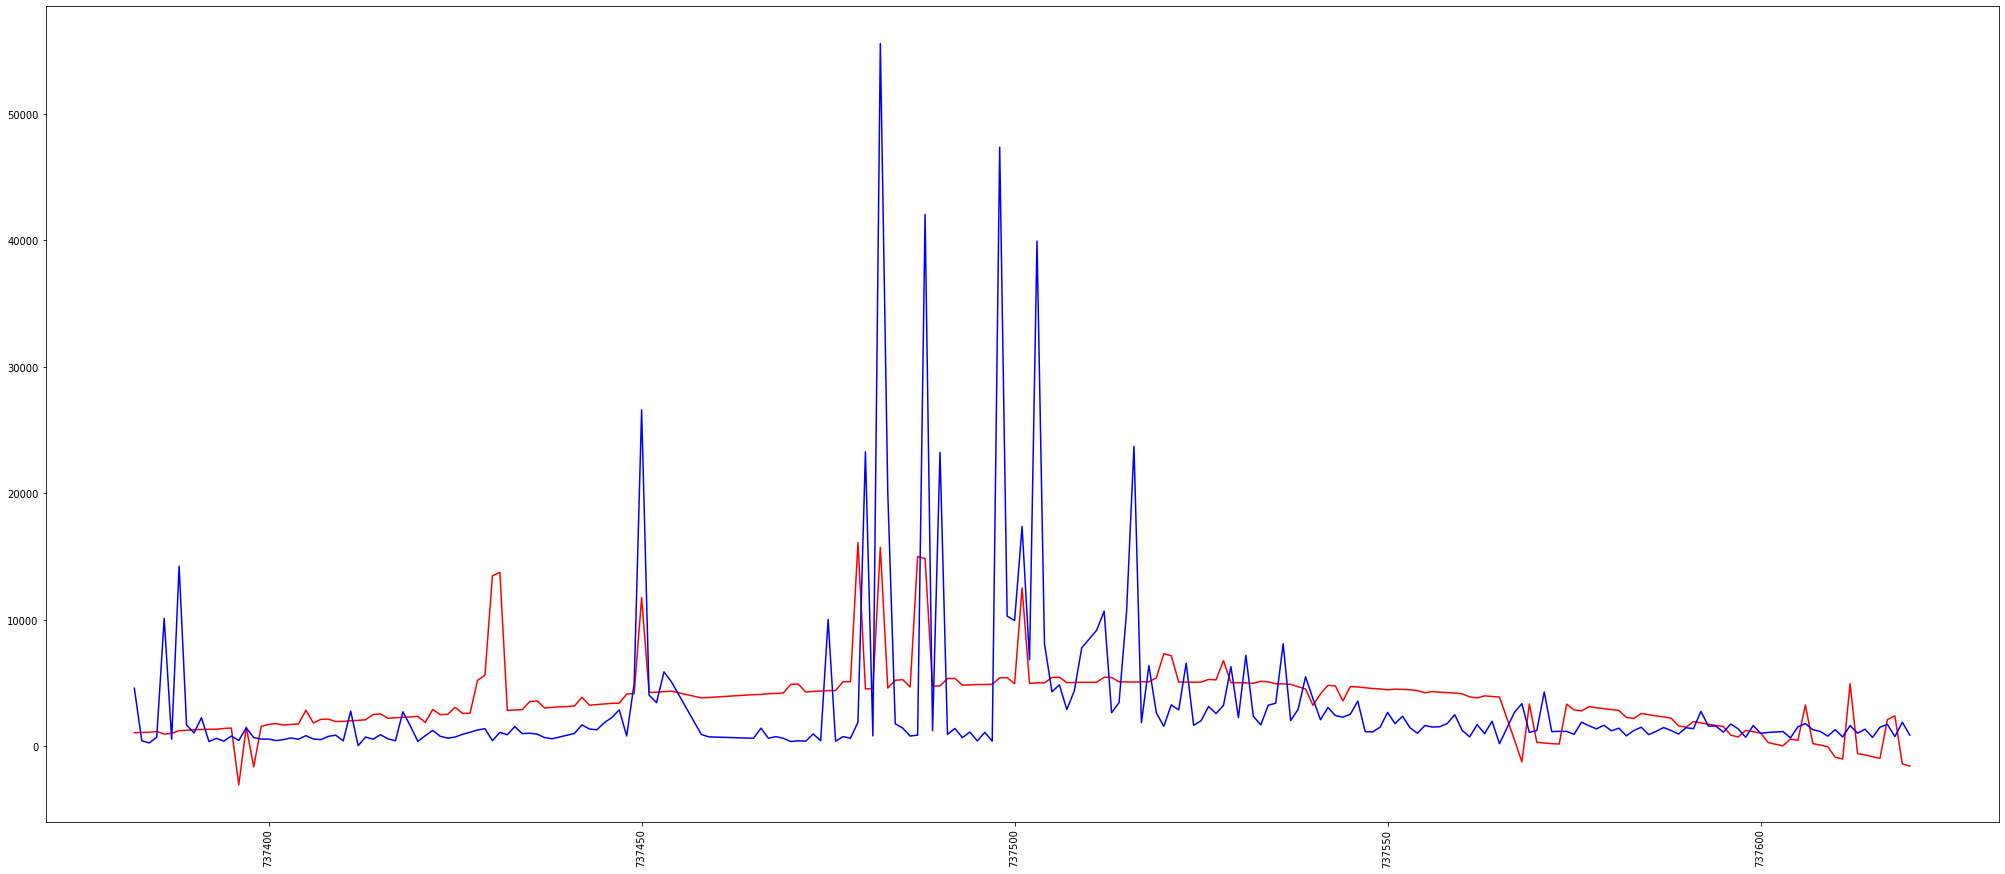

In [158]:
fig = plt.figure(figsize=(35, 15))#展示
ax = fig.add_subplot(111)
ax.plot(X.iloc[:,0],y_hat,'r-')
ax.plot(X.iloc[:,0],y,'b-')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

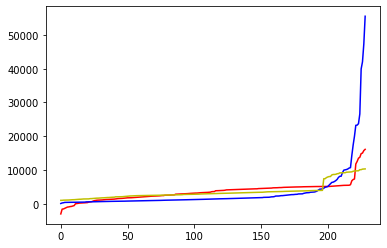

In [159]:
plt.plot(range(len(y_hat)),sorted(y_hat),'r-',label = 'polypredict')
plt.plot(range(len(y)),sorted(y),'b-',label = 'data')
plt.plot(range(len(Y_hat)),sorted(Y_hat),'y-',label = 'predict')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

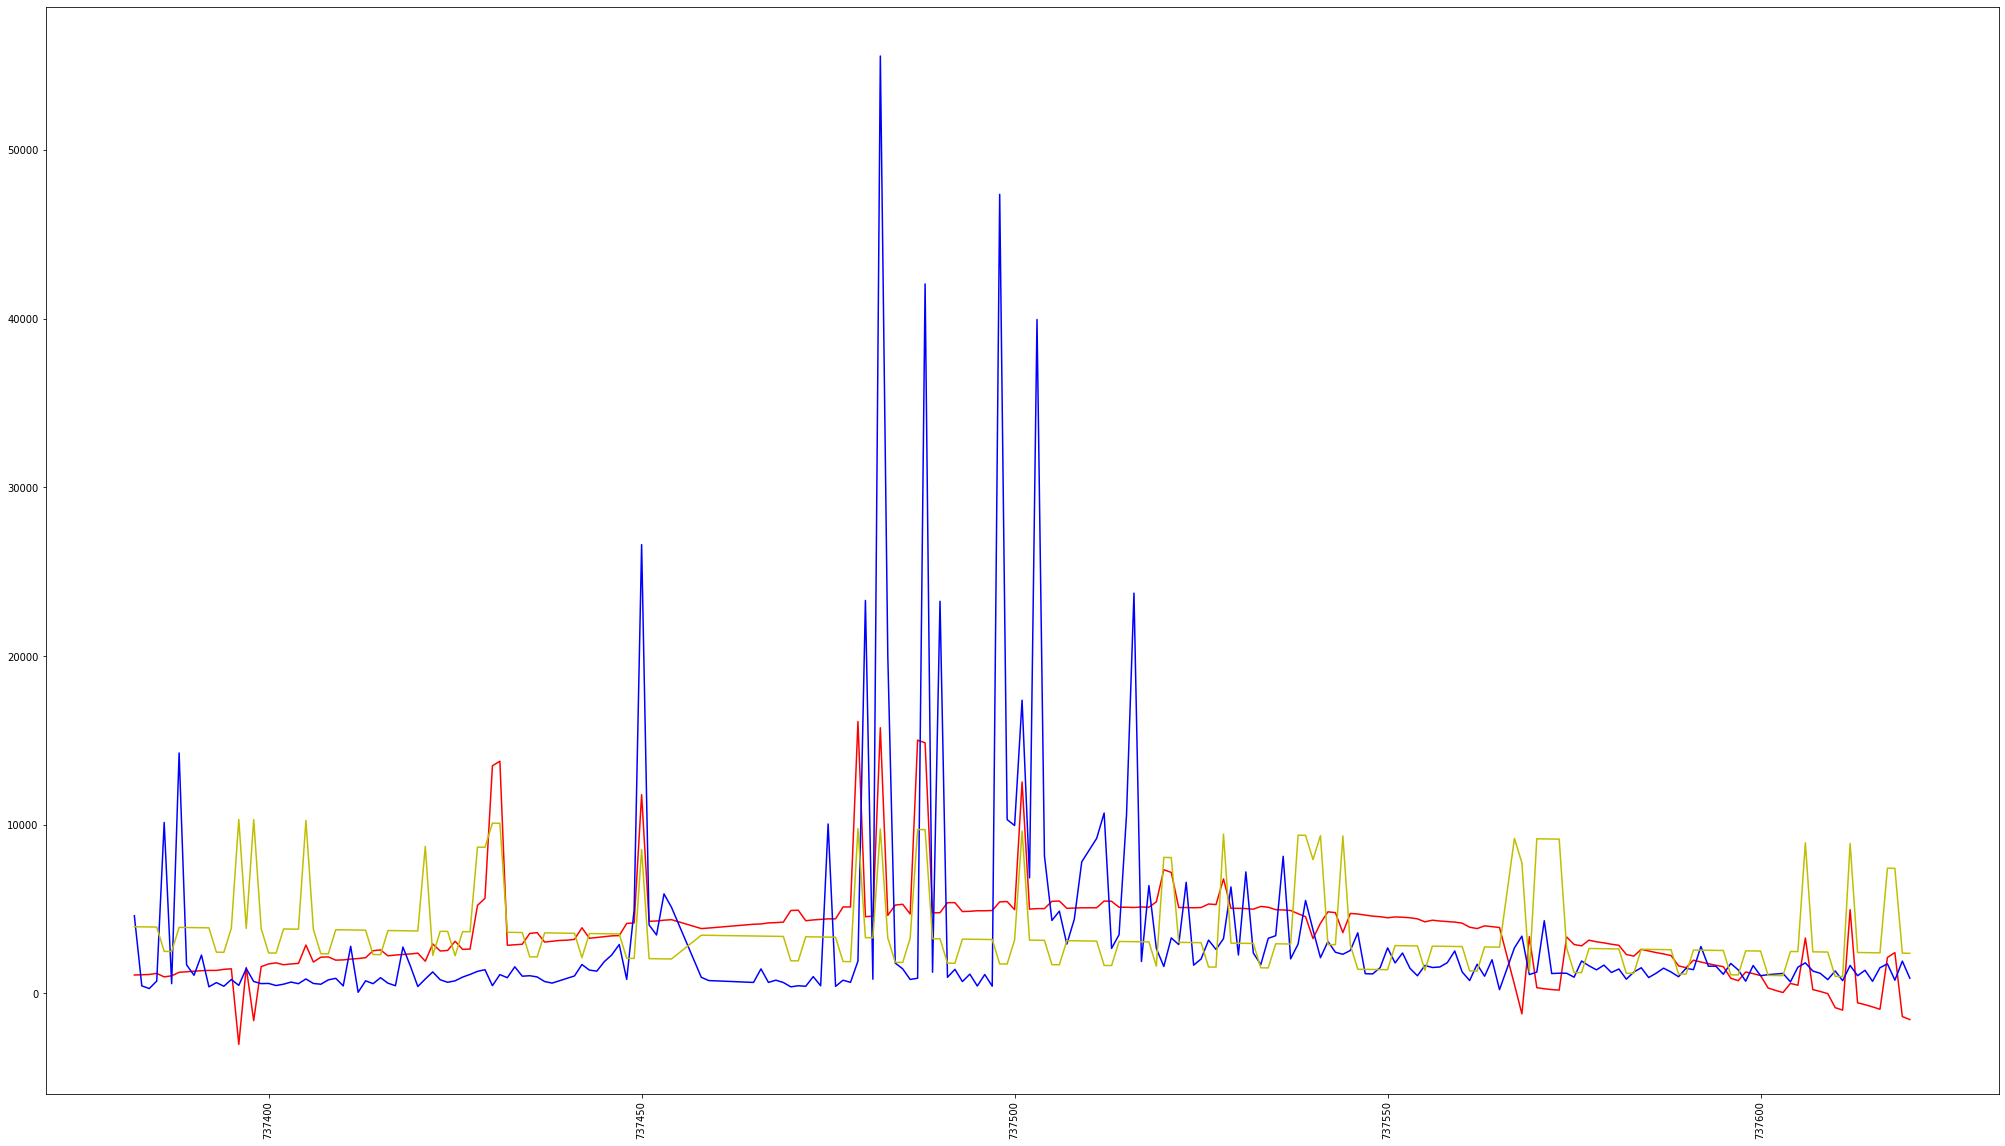

In [161]:
fig = plt.figure(figsize=(35, 20))#展示
ax = fig.add_subplot(111)
ax.plot(X.iloc[:,0],y_hat,'r-')
ax.plot(X.iloc[:,0],y,'b-')
ax.plot(X.iloc[:,0],Y_hat,'y-')
plt.xticks(rotation=90)
plt.show

In [163]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [164]:
# mean_absolute_error(Ytest,Y_pre)#平均绝对误差

3828.0187688606065

In [165]:
mean_absolute_error(y,Y_hat)#线性回归平均绝对误差

3669.9516048470778

In [166]:
mean_absolute_error(y,y_hat)#多项式回归平均绝对误差

3328.6009606986895